<a href="https://colab.research.google.com/github/Ambujatwork/Social_Unrest_Analysis/blob/main/Rainfall3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from scipy.stats import skew

In [ ]:
df = pd.read_csv('Quazigund.csv')

In [ ]:
df.head()

In [ ]:
df.drop(['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12'],axis=1,inplace=True)
print(df)

       STNID  Year  Month  Day  TempMax  Temp Min  Rain,mm RH 0830 RH 1730
0      42044  1974      1    1      9.5      -2.7      0.0      96      61
1      42044  1974      1    2     10.9      -3.6      0.0      96      57
2      42044  1974      1    3     11.1      -2.6      0.0      93      61
3      42044  1974      1    4      8.7      -3.2      0.0      93      64
4      42044  1974      1    5     10.9      -4.1      0.0      88      56
...      ...   ...    ...  ...      ...       ...      ...     ...     ...
16431  42044  2018     12   27      NaN       NaN      NaN     NaN     NaN
16432  42044  2018     12   28      NaN       NaN      NaN     NaN     NaN
16433  42044  2018     12   29      NaN       NaN      NaN     NaN     NaN
16434  42044  2018     12   30      NaN       NaN      NaN     NaN     NaN
16435  42044  2018     12   31      NaN       NaN      NaN     NaN     NaN

[16436 rows x 9 columns]


In [ ]:
df.drop(['STNID'],axis=1,inplace=True)


In [ ]:
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])
df

,Year,Month,Day,TempMax,Temp Min,"Rain,mm",RH 0830,RH 1730,Date
0,1974,1,1,9.5,-2.7,0.0,96,61,1974-01-01
1,1974,1,2,10.9,-3.6,0.0,96,57,1974-01-02
2,1974,1,3,11.1,-2.6,0.0,93,61,1974-01-03
3,1974,1,4,8.7,-3.2,0.0,93,64,1974-01-04
4,1974,1,5,10.9,-4.1,0.0,88,56,1974-01-05
...,...,...,...,...,...,...,...,...,...
16431,2018,12,27,NaN,NaN,NaN,NaN,NaN,2018-12-27
16432,2018,12,28,NaN,NaN,NaN,NaN,NaN,2018-12-28
16433,2018,12,29,NaN,NaN,NaN,NaN,NaN,2018-12-29
16434,2018,12,30,NaN,NaN,NaN,NaN,NaN,2018-12-30


In [ ]:
df.dropna(inplace=True)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.rename(columns={'Temp Min': 'TempMin'}, inplace=True)
df.rename(columns={'RH 0830': 'RH_0830'}, inplace=True)
df.rename(columns={'RH 1730': 'RH_1730'}, inplace=True)
df.rename(columns={'Rain,mm': 'Rain'},inplace=True)

<Axes: xlabel='Rain'>

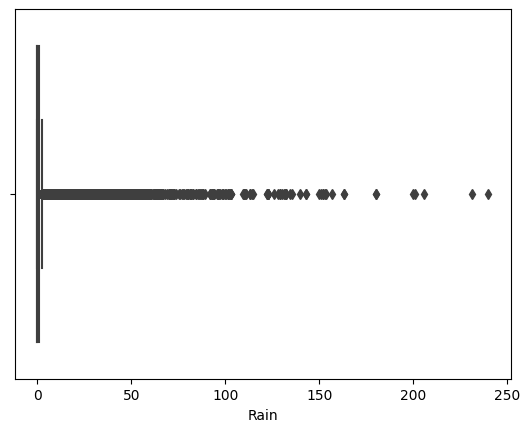

In [ ]:
sns.boxplot(x = 'Rain',data=df)

<Axes: xlabel='TempMax'>

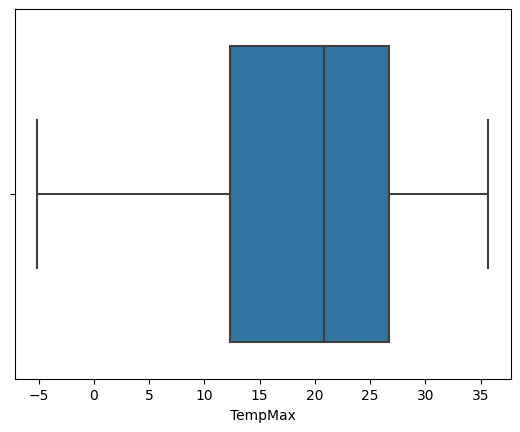

In [ ]:
sns.boxplot(x = 'TempMax',data=df)

<Axes: xlabel='TempMin'>

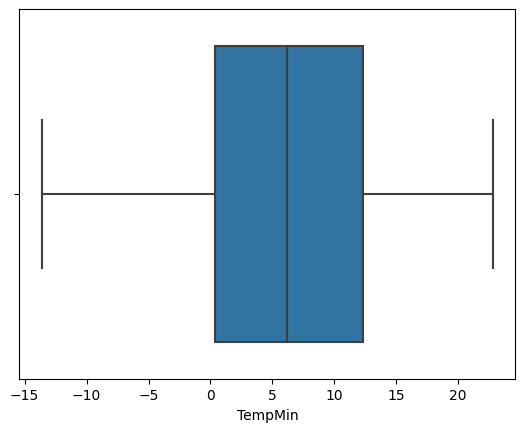

In [ ]:
sns.boxplot(x = 'TempMin',data=df)

In [ ]:
print(skew(df['Rain'], axis=0, bias=True))

7.009138326357157


In [ ]:
! pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
X = df.drop(['Rain'],axis=1)
Y = df['Rain']

In [ ]:
Y.value_counts()

0.0      11259
0.4        226
0.6        179
0.2        176
1.2        151
         ...  
28.3         1
114.3        1
151.9        1
231.5        1
82.8         1
Name: Rain, Length: 543, dtype: int64

<Axes: ylabel='Rain'>

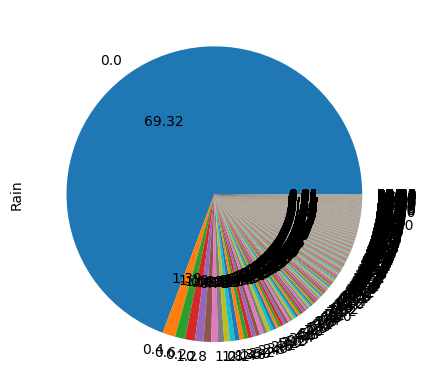

In [ ]:
Y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
df.head()

,Year,Month,Day,TempMax,TempMin,Rain,RH_0830,RH_1730,Date
0,1974,1,1,9.5,-2.7,0.0,96,61,1974-01-01
1,1974,1,2,10.9,-3.6,0.0,96,57,1974-01-02
2,1974,1,3,11.1,-2.6,0.0,93,61,1974-01-03
3,1974,1,4,8.7,-3.2,0.0,93,64,1974-01-04
4,1974,1,5,10.9,-4.1,0.0,88,56,1974-01-05


In [ ]:
import pandas as pd



def replace_zeros_with_mean_nearest_nonzero(df):
    result_df = df.copy()

    for index, row in df.iterrows():
        if row['Rain'] == 0:
            left_index = index - 1
            right_index = index + 1

            while left_index >= 0 and df.at[left_index, 'Rain'] == 0:
                left_index -= 1
            while right_index < len(df) and df.at[right_index, 'Rain'] == 0:
                right_index += 1

            if left_index >= 0 and right_index < len(df):
                mean_value = (df.at[left_index, 'Rain'] + df.at[right_index, 'Rain']) / 2.0
            elif left_index >= 0:
                mean_value = df.at[left_index, 'Rain']
            elif right_index < len(df):
                mean_value = df.at[right_index, 'Rain']
            else:

                mean_value = 0


            result_df.at[index, 'Rain'] = mean_value

    return result_df

new_df = replace_zeros_with_mean_nearest_nonzero(df)


print(new_df)



       Year  Month  Day  TempMax  TempMin  Rain RH_0830 RH_1730       Date
0      1974      1    1      9.5     -2.7  10.5      96      61 1974-01-01
1      1974      1    2     10.9     -3.6  10.5      96      57 1974-01-02
2      1974      1    3     11.1     -2.6  10.5      93      61 1974-01-03
3      1974      1    4      8.7     -3.2  10.5      93      64 1974-01-04
4      1974      1    5     10.9     -4.1  10.5      88      56 1974-01-05
...     ...    ...  ...      ...      ...   ...     ...     ...        ...
16237  2018      7   27     25.4     18.4   3.0      96      80 2018-07-27
16238  2018      7   28     24.6     18.0   3.0      78      63 2018-07-28
16239  2018      7   29     25.0     14.6   3.0      86      80 2018-07-29
16240  2018      7   30     28.4     14.3   3.0      75      57 2018-07-30
16241  2018      7   31     30.0     12.6   3.0      62      68 2018-07-31

[16242 rows x 9 columns]


In [ ]:
# import pandas as pd
# import random


# def replace_some_zeros_with_random_nonzero(df, replace_percent=0.7):
#     result_df = df.copy()  # Make a copy of the original DataFrame

#     # Create a list of indices with 0 values
#     zero_indices = result_df.index[result_df['Rain'] == 0].tolist()

#     # Calculate the number of 0 values to replace
#     num_to_replace = int(len(zero_indices) * replace_percent)

#     # Randomly select indices to replace
#     indices_to_replace = random.sample(zero_indices, num_to_replace)

#     for index in indices_to_replace:
#         # Find random non-zero value
#         non_zero_values = result_df['Rain'][result_df['Rain'] != 0].tolist()
#         random_non_zero_value = random.choice(non_zero_values)

#         # Replace the 0 value with the random non-zero value
#         result_df.at[index, 'Rain'] = random_non_zero_value

#     return result_df

# # Apply the function to the DataFrame 'df' to replace 70% of zero values
# new_df = replace_some_zeros_with_random_nonzero(df, replace_percent=0.7)

# # Print the updated DataFrame 'new_df'
# print(new_df)


<Axes: ylabel='Rain'>

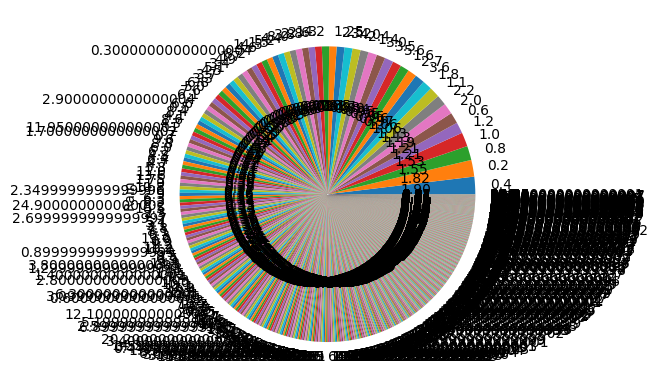

In [ ]:
X = new_df.drop(['Rain'],axis=1)
Y = new_df['Rain']
Y.value_counts().plot.pie(autopct='%.2f')

<Axes: xlabel='Rain'>

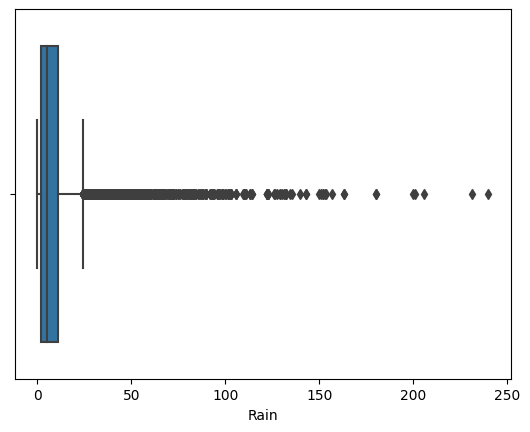

In [ ]:

sns.boxplot(x = 'Rain',data=new_df)

Epoch 1/50
160/160 - 3s - loss: 0.0579 - val_loss: 0.0019 - 3s/epoch - 22ms/step
Epoch 2/50
160/160 - 2s - loss: 0.0024 - val_loss: 0.0016 - 2s/epoch - 10ms/step
Epoch 3/50
160/160 - 2s - loss: 0.0023 - val_loss: 0.0015 - 2s/epoch - 13ms/step
Epoch 4/50
160/160 - 3s - loss: 0.0023 - val_loss: 0.0016 - 3s/epoch - 18ms/step
Epoch 5/50
160/160 - 2s - loss: 0.0024 - val_loss: 0.0016 - 2s/epoch - 10ms/step
Epoch 6/50
160/160 - 1s - loss: 0.0023 - val_loss: 0.0015 - 1s/epoch - 9ms/step
Epoch 7/50
160/160 - 1s - loss: 0.0023 - val_loss: 0.0014 - 1s/epoch - 9ms/step
Epoch 8/50
160/160 - 1s - loss: 0.0023 - val_loss: 0.0014 - 1s/epoch - 9ms/step
Epoch 9/50
160/160 - 1s - loss: 0.0022 - val_loss: 0.0017 - 1s/epoch - 9ms/step
Epoch 10/50
160/160 - 2s - loss: 0.0022 - val_loss: 0.0015 - 2s/epoch - 10ms/step
Epoch 11/50
160/160 - 2s - loss: 0.0023 - val_loss: 0.0016 - 2s/epoch - 10ms/step
Epoch 12/50
160/160 - 3s - loss: 0.0023 - val_loss: 0.0018 - 3s/epoch - 18ms/step
Epoch 13/50
160/160 - 2s - lo

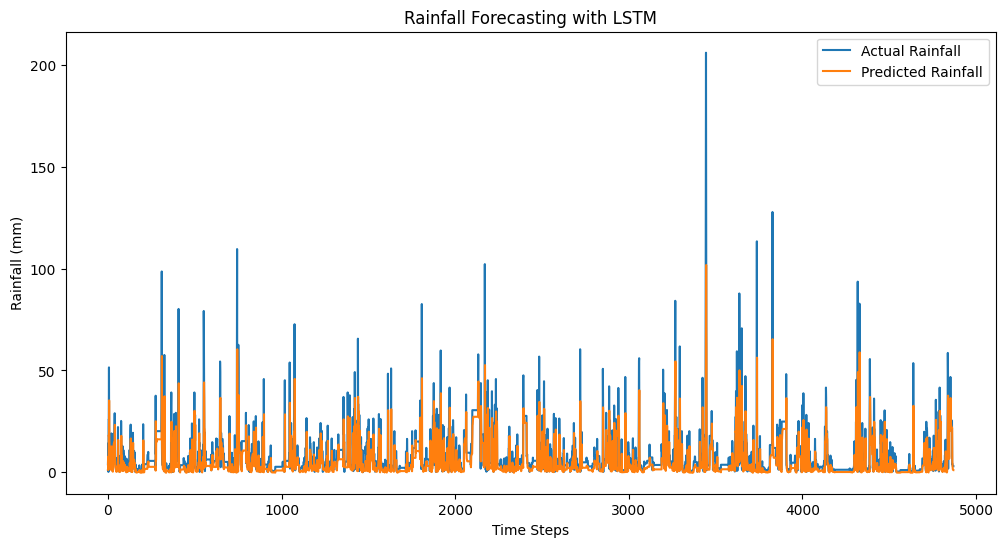

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam



rainfall_data = new_df['Rain'].values

scaler = MinMaxScaler()
rainfall_data = scaler.fit_transform(rainfall_data.reshape(-1, 1))


def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)


sequence_length = 6


X, y = create_sequences(rainfall_data, sequence_length)

split_ratio = 0.7
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# learning rate
custom_adam_opotimizer = Adam(learning_rate=0.1)

model = Sequential()
model.add(LSTM(units=100, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer=custom_adam_opotimizer, loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1, verbose=2)


y_pred = model.predict(X_test)


y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# actual vs. predicted rainfall values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Rainfall')
plt.plot(y_pred, label='Predicted Rainfall')
plt.legend()
plt.title('Rainfall Forecasting with LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Rainfall (mm)')
plt.show()
